In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
#data
data = pd.read_csv('/home/aurorareichbjorn/Dev/TDT4173/ml_group21/data/kernel/receivals.csv')

data.head()

,rm_id,product_id,purchase_order_id,purchase_order_item_no,receival_item_no,batch_id,date_arrival,receival_status,net_weight,supplier_id
0,365.0,91900143.0,208545.0,10.0,1,NaN,2004-06-15 13:34:00 +02:00,Completed,11420.0,52062
1,365.0,91900143.0,208545.0,10.0,2,NaN,2004-06-15 13:34:00 +02:00,Completed,13760.0,52062
2,365.0,91900143.0,208490.0,10.0,1,NaN,2004-06-15 13:38:00 +02:00,Completed,11281.0,50468
3,365.0,91900143.0,208490.0,10.0,2,NaN,2004-06-15 13:38:00 +02:00,Completed,13083.0,50468
4,379.0,91900296.0,210435.0,20.0,1,NaN,2004-06-15 13:40:00 +02:00,Completed,23910.0,52577


In [3]:
data.describe()

,rm_id,product_id,purchase_order_id,purchase_order_item_no,receival_item_no,batch_id,net_weight,supplier_id
count,122533.000000,1.225330e+05,122537.000000,122537.000000,122590.000000,6.476500e+04,122522.000000,122590.000000
mean,2151.938621,9.137382e+07,270360.509095,101.965447,1.448161,8.898592e+05,12972.566543,54205.502512
std,508.218510,6.935966e+06,35351.498239,130.103785,0.846757,1.719882e+05,8264.652621,16205.996364
min,342.000000,1.002000e+03,363.000000,10.000000,0.000000,4.390300e+04,0.000000,10001.000000
25%,1906.000000,9.190014e+07,236857.000000,10.000000,1.000000,7.462680e+05,5660.000000,50468.000000
50%,2130.000000,9.190014e+07,272803.000000,40.000000,1.000000,8.920690e+05,12380.000000,54963.000000
75%,2160.000000,9.190030e+07,300251.000000,150.000000,2.000000,1.041403e+06,21120.000000,64997.000000
max,4501.000000,9.190209e+07,331105.000000,930.000000,14.000000,1.178438e+06,31626.000000,89894.000000


      rm_id  antall_product_id
161  3362.0                  2
1     343.0                  1
0     342.0                  1
3     346.0                  1
4     347.0                  1
..      ...                ...
198  4461.0                  1
199  4462.0                  1
200  4463.0                  1
201  4481.0                  1
202  4501.0                  1

[203 rows x 2 columns]


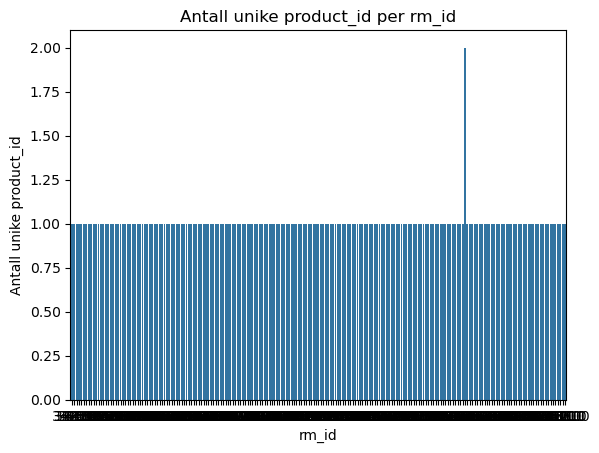

In [4]:
#Antall unike produkter per materiale
product_counts = data.groupby('rm_id')['product_id'].nunique().reset_index(name='antall_product_id')
product_counts = product_counts.sort_values(by='antall_product_id', ascending=False)
print(product_counts)

sns.barplot(data=product_counts, x='rm_id', y='antall_product_id')
plt.xlabel('rm_id')
plt.ylabel('Antall unike product_id')
plt.title('Antall unike product_id per rm_id')
plt.show()

#rm_id 3362 er det eneste med to 2 produkter, alle andre har 1 --> dette er altså ikke en viktig sammenheng

      rm_id  antall_leveranser
75   2130.0              23621
55   1903.0              19337
102  2160.0              13507
83   2140.0               5343
85   2142.0               4625
..      ...                ...
193  4343.0                  1
194  4381.0                  1
198  4461.0                  1
200  4463.0                  1
199  4462.0                  1

[203 rows x 2 columns]


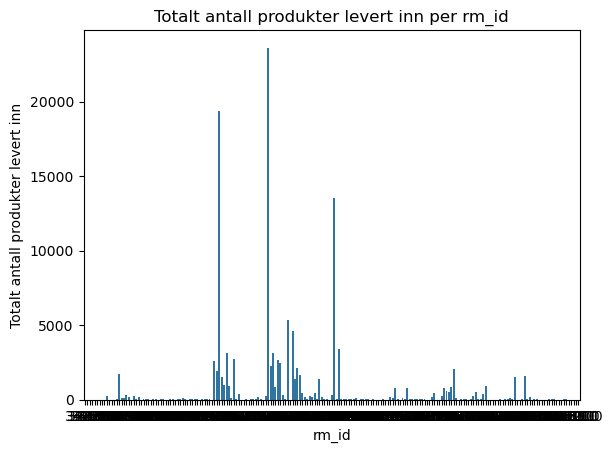

In [5]:
#Hvile materialer er mest "populære"? = antall produkter levert inn per rm_id
total_products_per_rm = data.groupby('rm_id').size().reset_index(name='antall_leveranser')
total_products_per_rm = total_products_per_rm.sort_values(by='antall_leveranser', ascending=False)  
print(total_products_per_rm)

sns.barplot(data=total_products_per_rm, x='rm_id', y='antall_leveranser')
plt.xlabel('rm_id')
plt.ylabel('Totalt antall produkter levert inn')
plt.title('Totalt antall produkter levert inn per rm_id')
plt.show()

      rm_id  total_net_weight
75   2130.0       351244347.0
55   1903.0       270574744.0
102  2160.0       161712550.0
83   2140.0       132512874.0
61   1909.0        66634224.0
..      ...               ...
30    390.0            2620.0
198  4461.0            2500.0
47   1872.0            2232.0
200  4463.0            2000.0
27    387.0            1780.0

[203 rows x 2 columns]


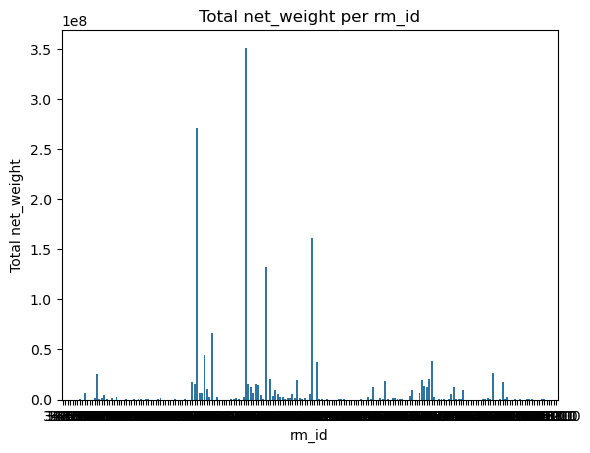

In [6]:
#Hva er totalvekten til hvert materiale?
weight_per_rm = data.groupby('rm_id')['net_weight'].sum().reset_index(name='total_net_weight')
weight_per_rm = weight_per_rm.sort_values(by='total_net_weight', ascending=False)
print(weight_per_rm)

sns.barplot(data=weight_per_rm, x='rm_id', y='total_net_weight')
plt.xlabel('rm_id')
plt.ylabel('Total net_weight')
plt.title('Total net_weight per rm_id')
plt.show()